In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('data/Country clusters.csv')

In [3]:
data

Country  Latitude  Longitude Language
0        USA     44.97    -103.77  English
1     Canada     62.40     -96.80  English
2     France     46.75       2.40   French
3         UK     54.01      -2.53  English
4    Germany     51.15      10.40   German
5  Australia    -25.45     133.11  English

(-90.0, 90.0)

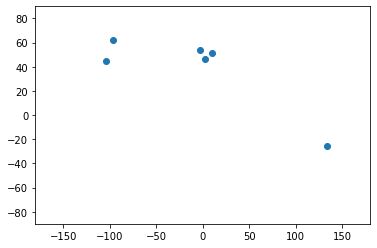

In [6]:
plt.scatter(data.Longitude, data.Latitude)
plt.xlim(-180,180)
plt.ylim(-90,90)

In [8]:
x = data.iloc[:, 1:3]
x.head(2)

Latitude  Longitude
0     44.97    -103.77
1     62.40     -96.80

In [9]:
kmeans = KMeans(3)

In [10]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [14]:
cluster =kmeans.fit_predict(x)

In [15]:
data['cluster'] = cluster

In [17]:
data

Country  Latitude  Longitude Language  cluster
0        USA     44.97    -103.77  English        0
1     Canada     62.40     -96.80  English        0
2     France     46.75       2.40   French        1
3         UK     54.01      -2.53  English        1
4    Germany     51.15      10.40   German        1
5  Australia    -25.45     133.11  English        2

(-90.0, 90.0)

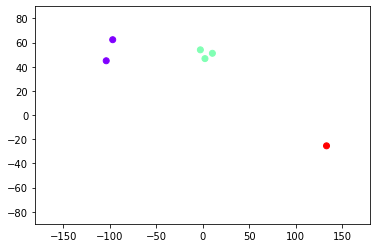

In [19]:
plt.scatter(data.Longitude, data.Latitude, c= data.cluster, cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)

(-90.0, 90.0)

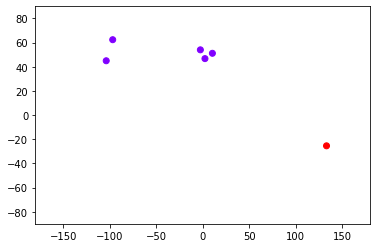

In [20]:
kmeans = KMeans(2)
kmeans.fit(x)
cluster =kmeans.fit_predict(x)
data['cluster2'] = cluster
plt.scatter(data.Longitude, data.Latitude, c= data.cluster2, cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)

In [22]:
data.Language.unique()

array(['English', 'French', 'German'], dtype=object)

In [27]:
data.Language =data.Language.map({'English':0, 'French':1 ,'German':2})

In [28]:
data

Country  Latitude  Longitude  Language  cluster  cluster2
0        USA     44.97    -103.77         0        0         0
1     Canada     62.40     -96.80         0        0         0
2     France     46.75       2.40         1        1         0
3         UK     54.01      -2.53         0        1         0
4    Germany     51.15      10.40         2        1         0
5  Australia    -25.45     133.11         0        2         1

(-90.0, 90.0)

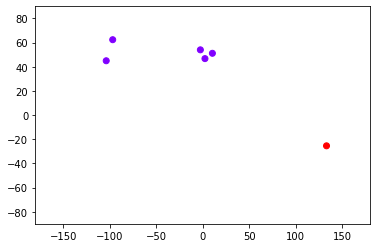

In [29]:
x = data.iloc[:, 1:4]
kmeans = KMeans(2)
kmeans.fit(x)
cluster =kmeans.fit_predict(x)
data['cluster2_lang'] = cluster
plt.scatter(data.Longitude, data.Latitude, c= data.cluster2_lang, cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)

In [33]:
raw_data = pd.read_csv('data/Categorical.csv')
raw_data.head(2)

name  Longitude   Latitude      continent
0        Aruba -69.982677  12.520880  North America
1  Afghanistan  66.004734  33.835231           Asia

In [35]:
raw_data.continent.unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania', 'Antarctica', 'Seven seas (open ocean)'], dtype=object)

In [36]:
data = raw_data.copy()

In [40]:
data['continent_num'] = data.continent.map({'North America':4, 'Asia':2,
                                            'Africa':0, 'Europe':3, 
                                            'South America':7,
                                            'Oceania':5, 
                                            'Antarctica':1, 
                                            'Seven seas (open ocean)':6})

In [38]:
# Within-Cluster-Sum-of-Squares (wcss)

In [39]:
kmeans.inertia_

13208.958119999996

In [42]:
x= data.iloc[:, 1:3]
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

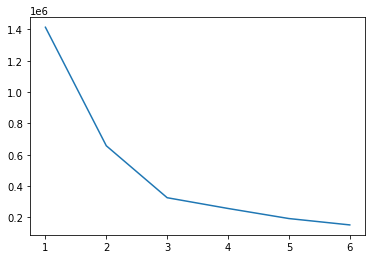

In [43]:
number_cluster=range(1,7)
plt.plot(number_cluster,wcss)

(-90.0, 90.0)

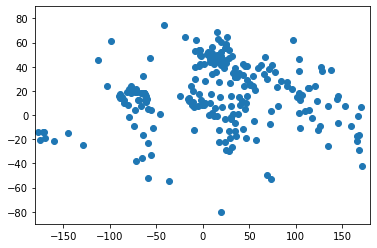

In [46]:
plt.scatter(data.Longitude, data.Latitude)
plt.xlim(-180,180)
plt.ylim(-90,90)

(-90.0, 90.0)

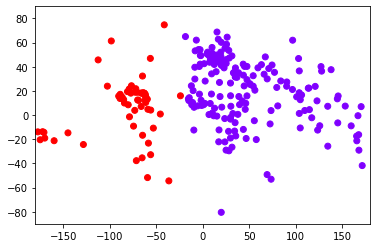

In [48]:
x= data.iloc[:, 1:3]
kmeans = KMeans(2)
kmeans.fit(x)
cluster = kmeans.fit_predict(x)
data['cluster2'] = cluster
plt.scatter(data.Longitude, data.Latitude, c= data.cluster2, cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)

(-90.0, 90.0)

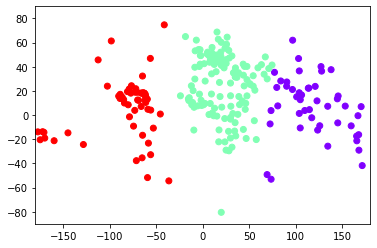

In [49]:
x= data.iloc[:, 1:3]
kmeans = KMeans(3)
kmeans.fit(x)
cluster = kmeans.fit_predict(x)
data['cluster3'] = cluster
plt.scatter(data.Longitude, data.Latitude, c= data.cluster3, cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)

In [51]:
iris = pd.read_csv('data/iris-dataset.csv')
iris.head(2)

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2

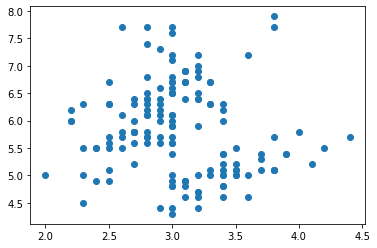

In [52]:
plt.scatter(iris.sepal_width, iris.sepal_length)

In [53]:
x= iris.iloc[:, 0:2]
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

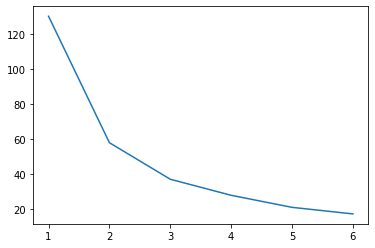

In [54]:
number_cluster=range(1,7)
plt.plot(number_cluster,wcss)

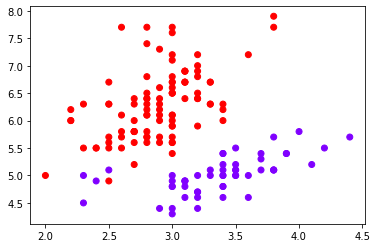

In [74]:
kmeans = KMeans(2)
kmeans.fit(iris)
cluster = kmeans.fit_predict(iris)
iris['cluster2'] = cluster
plt.scatter(iris.sepal_width, iris.sepal_length, c= iris.cluster2, cmap='rainbow')

In [75]:
from sklearn.preprocessing import scale

In [76]:
xscaled = scale(iris)

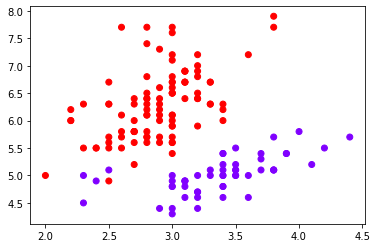

In [77]:
kmeans = KMeans(2)
kmeans.fit(xscaled)
cluster = kmeans.fit_predict(xscaled)
iris['scluster2'] = cluster
plt.scatter(iris.sepal_width, iris.sepal_length, c= iris.scluster2, cmap='rainbow')